# Linear Regression with gluon

In [3]:
from __future__ import print_function
import mxnet as mx
from mxnet import nd, autograd, gluon

### Set the context

In [5]:
data_ctx = mx.cpu()
model_ctx = mx.cpu()

### Build the dataset

In [7]:
num_inputs = 2
num_outputs = 1
num_examples = 10000

def real_fn(X):
    return 2 * X[:, 0] - 3.4 * X[:, 1] + 4.2

X = nd.random_normal(shape = (num_examples, num_inputs))
noise = 0.01 * nd.random_normal(shape = (num_examples,))
y = real_fn(X) + noise

### Load the data iterator

In [9]:
batch_size = 4
train_data = gluon.data.DataLoader(gluon.data.ArrayDataset(X, y),
                                  batch_size = batch_size, shuffle = True)

### Define the model

In [10]:
net = gluon.nn.Dense(1, in_units=2) #output node 1개 input node 2개라는 뜻

In [11]:
## 직접 NDArray형태를 쓰지 않고 새로운 Class사용.
# 초기값 설정에 여러 가지 편리한 기능 제공
print(net.weight)
print(net.bias)

Parameter dense0_weight (shape=(1, 2), dtype=<class 'numpy.float32'>)
Parameter dense0_bias (shape=(1,), dtype=<class 'numpy.float32'>)


In [12]:
net.collect_params()

dense0_ (
  Parameter dense0_weight (shape=(1, 2), dtype=<class 'numpy.float32'>)
  Parameter dense0_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)

In [13]:
type(net.collect_params())

mxnet.gluon.parameter.ParameterDict

### Initialize parameters

In [14]:
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

### Deferred Initialization

In [15]:
example_data = nd.array([[4,7]])
net(example_data)


[[ 8.65242577]]
<NDArray 1x1 @cpu(0)>

In [17]:
print(net.weight.data())
print(net.bias.data())


[[ 0.47811309  0.96285337]]
<NDArray 1x2 @cpu(0)>

[ 0.]
<NDArray 1 @cpu(0)>


### Shape Inference

In [18]:
## 인풋 사이즈 지정 안해줘도 알아서 데이터 넣으면 잡아줌
net = gluon.nn.Dense(1)
net.collect_params().initialize(mx.init.Normal(sigma=1.), ctx=model_ctx)

### Define Loss

In [19]:
square_loss = gluon.loss.L2Loss()

### Optimizer

In [21]:
trainer = gluon.Trainer(net.collect_params(), 'sgd', {'learning_rate': 0.0001})

### Execute Train

In [22]:
epochs = 10
loss_sequence = []
num_batches = num_examples / batch_size

for e in range(epochs):
    cumulative_loss = 0
    # inner loop
    for i, (data, label) in enumerate(train_data):
        data = data.as_in_context(model_ctx)
        label = label.as_in_context(model_ctx)
        with autograd.record():
            output = net(data)
            loss = square_loss(output, label)
        loss.backward()
        trainer.step(batch_size)
        cumulative_loss += nd.mean(loss).asscalar()
    print("Epoch %s, loss: %s" % (e, cumulative_loss / num_examples))
    loss_sequence.append(cumulative_loss)

Epoch 0, loss: 3.02174267878
Epoch 1, loss: 1.8228607998
Epoch 2, loss: 1.0997325858
Epoch 3, loss: 0.663525429933
Epoch 4, loss: 0.40037484043
Epoch 5, loss: 0.241611173302
Epoch 6, loss: 0.145816333305
Epoch 7, loss: 0.0880108408156
Epoch 8, loss: 0.0531283080019
Epoch 9, loss: 0.0320762640585


### visualizing

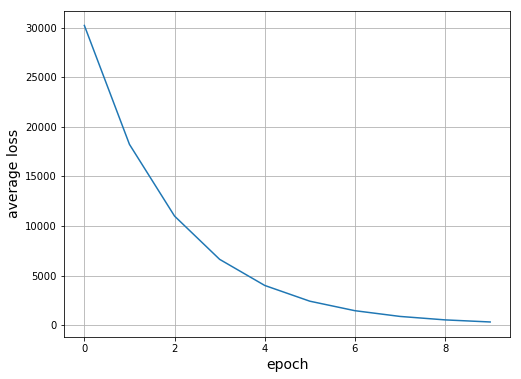

In [23]:
# plot the convergence of the estimated loss function
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

plt.figure(num=None,figsize=(8, 6))
plt.plot(loss_sequence)

# Adding some bells and whistles to the plot
plt.grid(True, which="both")
plt.xlabel('epoch',fontsize=14)
plt.ylabel('average loss',fontsize=14)

### Getting the learned model parameters

In [24]:
params = net.collect_params() #returns dictionary of parameters

In [26]:
print('The type of "params" is a ',type(params))
print('params =', params)

The type of "params" is a  <class 'mxnet.gluon.parameter.ParameterDict'>
params = dense1_ (
  Parameter dense1_weight (shape=(1, 2), dtype=<class 'numpy.float32'>)
  Parameter dense1_bias (shape=(1,), dtype=<class 'numpy.float32'>)
)


In [27]:
# if you want to get values of parameters
for param in params.values():
    print(param.name.param.data())

AttributeError: 'str' object has no attribute 'param'